In [ ]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import geocoder
from folium import plugins
import time
%matplotlib inline

# New Section

In [ ]:
!pip install folium==0.5.0

In [ ]:
!pip install geocoder

In [ ]:
folium.__version__

'0.5.0'

**Data prepocessing**

1. if there are dif names for same column
2. checking the data format for the feature
3. checking if there are any duplicates
4. checking if there are any null values
 

In [ ]:
df_incidents=pd.read_csv('olist_geolocation_dataset.csv')

In [ ]:
df_incidents.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_incidents.shape

(1000163, 5)

In [ ]:
df_incidents.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [ ]:
for i,name in enumerate(df_incidents.columns):
    print(str(i) +':  '+name)

0:  geolocation_zip_code_prefix
1:  geolocation_lat
2:  geolocation_lng
3:  geolocation_city
4:  geolocation_state


In [ ]:
len('geolocation_')

12

**1)Renaming the columns labels**

In [ ]:
#changing the name of columns
labelnames=[]
for name in df_incidents.columns:
    labelnames.append(name[12:])
print(labelnames)

['zip_code_prefix', 'lat', 'lng', 'city', 'state']


In [ ]:
#df_incidents=pd.read_csv('olist_geolocation_dataset.csv',names=labelnames)
df_incidents.columns=labelnames
df_incidents.head()

,zip_code_prefix,lat,lng,city,state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**2)checking the data type**

In [ ]:
df_incidents.dtypes

zip_code_prefix      int64
lat                float64
lng                float64
city                object
state               object
dtype: object

**3)check the missing values**

In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   zip_code_prefix  1000163 non-null  int64  
 1   lat              1000163 non-null  float64
 2   lng              1000163 non-null  float64
 3   city             1000163 non-null  object 
 4   state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
df_incidents.isna()

,zip_code_prefix,lat,lng,city,state
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1000158,False,False,False,False,False
1000159,False,False,False,False,False
1000160,False,False,False,False,False
1000161,False,False,False,False,False


In [ ]:
df_incidents.isna().any()

zip_code_prefix    False
lat                False
lng                False
city               False
state              False
dtype: bool

In [ ]:
df_incidents.isna().sum()

zip_code_prefix    0
lat                0
lng                0
city               0
state              0
dtype: int64

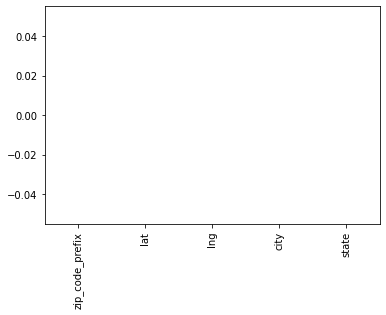

In [ ]:
df_incidents.isna().sum().plot(kind='bar')
plt.show()

In [ ]:
df_incidents.dropna(inplace=True)
df_incidents.shape   #only one row is removed

(1000163, 5)

In [ ]:
df_incidents.isna().sum()

zip_code_prefix    0
lat                0
lng                0
city               0
state              0
dtype: int64

In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   zip_code_prefix  1000163 non-null  int64  
 1   lat              1000163 non-null  float64
 2   lng              1000163 non-null  float64
 3   city             1000163 non-null  object 
 4   state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.8+ MB


**3)check if there are any duplicates**

In [ ]:
df_incidents.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool

In [ ]:
sum(df_incidents.duplicated())    #there are 195389 duplicate values

261836

In [ ]:
df_incidents.drop_duplicates(inplace=True)
#df_incidents=df_incidents.drop_duplicates()

In [ ]:
df_incidents.shape    #after removing the duplicate rows

(738327, 5)

**check the number of unique values within each column**

In [ ]:
df_incidents.nunique()

zip_code_prefix     19015
lat                716685
lng                717097
city                 8011
state                  27
dtype: int64

**adding a geometry column**

In [ ]:
df_incidents['geometry']=df_incidents.apply(lambda x:Point((x.lng,x.lat)),axis=1)

In [ ]:
df_incidents.head()

,zip_code_prefix,lat,lng,city,state,geometry
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929205 -23.54562128)
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.6448203 -23.54608113)
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295148 -23.54612897)
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63949931 -23.54439216)
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64160722 -23.54157796)


In [ ]:
df_incidents.shape

(738327, 6)

**So each row consists of 6 features:**
> 1. **zip_code_prefix**:  zip code of city
> 2. **lat**: latitude of city
> 3. **lng**: longitude of city
> 4. **city**: name of the city
> 5. **state**: name of the state
> 6. **geometry**: A tuple of the latitude and the longitude values

 we have 494285 rows and 6 columns(features)

In [ ]:
df_incidents=df_incidents.iloc[np.random.randint(df_incidents.shape[0], size=150),: ]
 
  

##**Official Documentation for Folium:**

In [ ]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

**Two methods to visualize brazil map:**
> 1. **geocoder Module**:  incase u don't know the lat and lng
> 2. **writing the latitude and longitude manually**

**First Method: geocoder Module**

In [ ]:
address = geocoder.osm('Brazil') 

In [ ]:
address_latlng = [address.lat, address.lng]
address_latlng

[-10.3333333, -53.2]

In [ ]:
br_map = folium.Map(location=address_latlng , zoom_start=4)
br_map


**Second Method:Writing the latitude and longitude manually**

In [ ]:
#14.2350° S, 51.9253° W
brazil_map = folium.Map(location=[-14.2350,-52.9253], zoom_start=4)

In [ ]:
display(brazil_map)

# *superimpose the location of cities on Brazil Map*
1. First Method 
2. Second Method

**1. First method**

**a)visualizing the location of cities with markers**

In [ ]:
brazil_map = folium.Map(location=[-14.2350,-52.9253], zoom_start=4)
for row in df_incidents.iterrows():
    row_values=row[1]   #selecting second element of tuple
    location=[row_values['lat'],row_values['lng']]
    marker=folium.Marker(location=location)
    marker.add_to(brazil_map)

In [ ]:
display(brazil_map)

**b)visualizing the location with marker and popup [zip_code_prefix:city]**

In [ ]:

brazil_map1 = folium.Map(location=[-14.2350,-52.9253], zoom_start=4)

for row in df_incidents.iterrows():
    row_values=row[1]   #selecting second element of tuple
    location=[row_values['lat'],row_values['lng']]
    popup = (str(row_values['zip_code_prefix']) + ': ' + 
             str(row_values['city']))
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(brazil_map1)
    
   

In [ ]:
display(brazil_map1)

**c)Visualizing  location with circle marker(state) and marker with popup[zip_code_prefix:city]**

In [ ]:
brazil_map1 = folium.Map(location=[-14.2350,-52.9253], zoom_start=4)
start=time.time()
for row in df_incidents.iterrows():
    row_values=row[1]   #selecting second element of tuple
    location=[row_values['lat'],row_values['lng']]
    popup = (str(row_values['zip_code_prefix']) + ': ' + 
             str(row_values['city']))
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(brazil_map1)
    marker1=folium.CircleMarker(location=location,popup=row_values['state'],radius=6,color='green',fill=True,fill_color='orange',fill_opacity=0.5)
    marker1.add_to(brazil_map1)
print("time taken:",time.time()-start)
display(brazil_map1)
    

time taken: 2.4053492546081543


In [ ]:
brazil_map.save('index.html')

**2. second method**

**a)visualizing with circle marker and labels only[city:state]**

In [ ]:
brazil_map2= folium.Map(location=[-14.2350,-52.9253], zoom_start=4)

incidents = folium.map.FeatureGroup()

# loop through the 150 cities and add each to the incidents feature group
for lat, lng, city ,state in zip(df_incidents.lat, df_incidents.lng, df_incidents.city,df_incidents.state):
    # add each crime circle on the feature group
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup='<strong>'+city+':'+state+'<strong>'
        )    
    )
print("time taken:",time.time()-start)
# add incidents to map
brazil_map2.add_child(incidents)

time taken: 100.00157737731934


**b)Add pop-up text label (city)with marker to the map besides the circle maker (state)**

In [ ]:
brazil_map2= folium.Map(location=[-14.2350,-52.9253], zoom_start=4)

incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, city,state in zip(df_incidents.lat, df_incidents.lng, df_incidents.city,df_incidents.state):
    # add each crime circle on the feature group
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=state
        )    
    )
    incidents.add_child(
        folium.Marker(
            [lat,lng]
            ,popup='<strong>'+city+'<strong>'                   #the text is bold
        )
    )
print("time taken:",time.time()-start)
# add incidents to map
brazil_map2.add_child(incidents)

time taken: 679.021687746048


In [ ]:
brazil_map= folium.Map(location=[-14.2350,-52.9253], zoom_start=4)

# instantiate a marker cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster()

# loop through the dataframe and add each data point to the marker cluster
for lat, lng, city in zip(df_incidents.lat, df_incidents.lng, df_incidents.city):
    # add pop-up text to each marker on the feature group
    incidents.add_child(
        folium.Marker(
            [lat, lng],
            popup=city
        )
    )

# add incidents to map
brazil_map.add_child(incidents)